In [95]:
import sys
sys.path.append('.')

import model

In [96]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random
import seaborn as sns
import statistics

In [97]:
plt.rcParams["font.family"] = "serif"

In [98]:
#data1 = pd.read_csv('data/QR_square_study_9.csv')
#data2 = pd.read_csv('data/QR_square_study_20211119_256.csv')

#data3 = pd.concat([data1, data2])
#data3.to_csv('data/QR_square_study_10.csv')

In [100]:
data = pd.read_csv('data/QR_square_study_10.csv')


#data['traced_edges+'] = data['traced_edges'] + 1
data['traced_edges_distant_ratio+'] = (data['traced_edges_distant'] + 1) / (data['traced_edges'] + 1)

#data['D'] = (data['p'] * data['q']) / ((1 - data['p']) * data['r'] + data['p'] * data['q'])
data['T'] = ((1 - data['p']) * data['r'] + data['p'] * data['q'])

In [101]:
data.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'time', 'A', 'W', 'C',
       'beta_hat', 'alpha', 'gamma', 'zeta', 'limit', 'q', 'r', 'N', 'M', 'p',
       'n_nodes', 's_final', 'infected_ratio', 'route_adjacent_ratio',
       'traced_edges', 'traced_edges_distant', 'traced_edges_close',
       'traced_edges_ratio', 'traced_edges_close_ratio',
       'group 0 adoption rate', 'group 1 adoption rate',
       'avg. exp. interval - group 0', 'avg. exp. interval - group 1',
       'avg. eff. inf. interval - group 0',
       'avg. eff. inf. interval - group 1', 'case',
       'traced_edges_distant_ratio+', 'T'],
      dtype='object')

Text(0.5, 0, 'Cases')

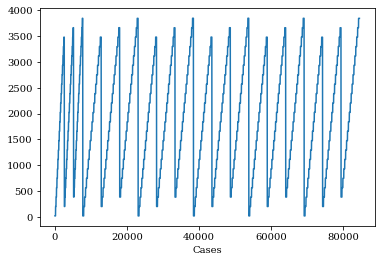

In [102]:
ax = plt.plot(data['traced_edges'])
plt.xlabel("Cases")

In [103]:
data.shape

(84480, 38)

In [104]:
data.groupby(['q','r'])['T'].count()

q     r   
0.05  0.00    1408
      0.05    1408
      0.10    1408
      0.15    1408
      0.20    1408
      0.25    1408
      0.30    1408
      0.35    1408
      0.40    1408
      0.45    1408
      0.50    1408
      0.55    1408
      0.60    1408
      0.65    1408
      0.70    1408
      0.75    1408
      0.80    1408
      0.85    1408
      0.90    1408
      0.95    1408
0.50  0.00    1408
      0.05    1408
      0.10    1408
      0.15    1408
      0.20    1408
      0.25    1408
      0.30    1408
      0.35    1408
      0.40    1408
      0.45    1408
      0.50    1408
      0.55    1408
      0.60    1408
      0.65    1408
      0.70    1408
      0.75    1408
      0.80    1408
      0.85    1408
      0.90    1408
      0.95    1408
0.95  0.00    1408
      0.05    1408
      0.10    1408
      0.15    1408
      0.20    1408
      0.25    1408
      0.30    1408
      0.35    1408
      0.40    1408
      0.45    1408
      0.50    1408
      0.55    1408
 

In [105]:
qrdata = data.groupby(['q','r'])['traced_edges_distant', 'traced_edges_close'].agg(['mean'])
qrdata.count()

/tmp/ipykernel_23059/1592122030.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  qrdata = data.groupby(['q','r'])['traced_edges_distant', 'traced_edges_close'].agg(['mean'])


traced_edges_distant  mean    60
traced_edges_close    mean    60
dtype: int64

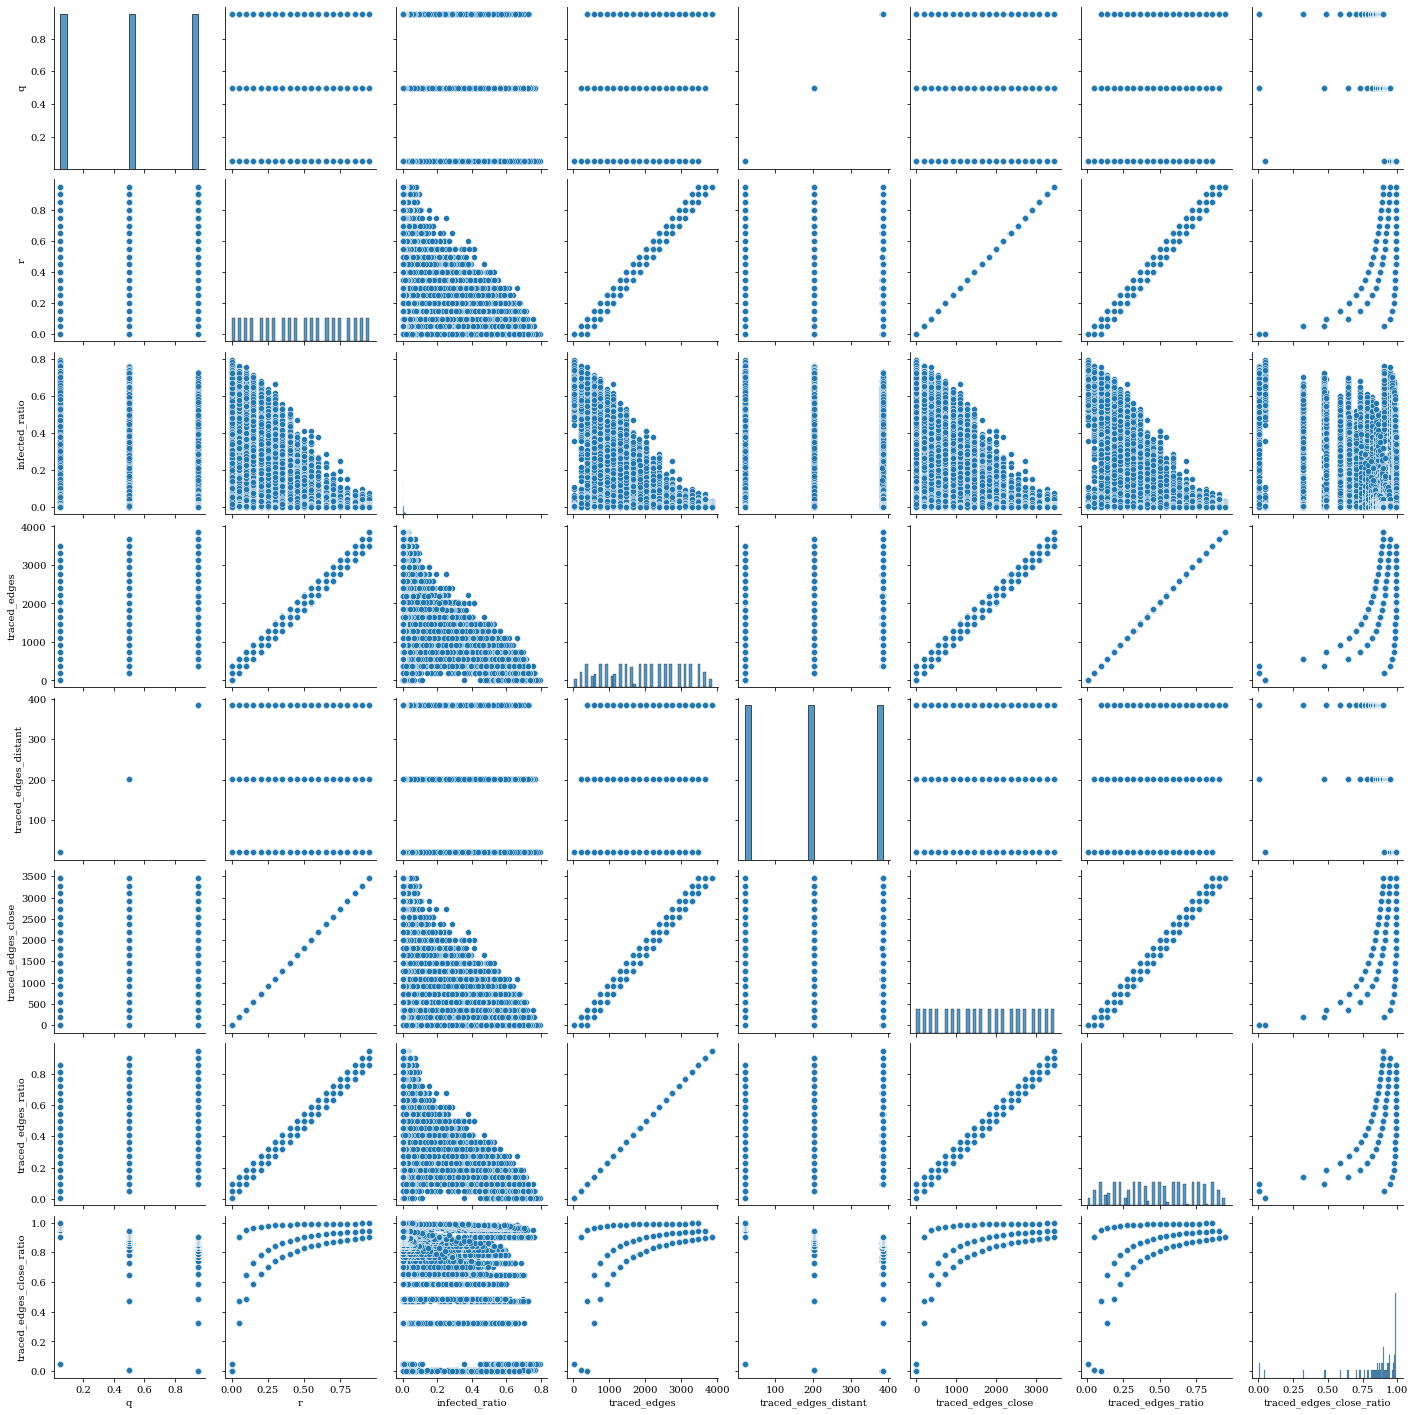

In [106]:
sns.pairplot(
    data[[
        'q','r',
        'infected_ratio',
        'traced_edges',
        'traced_edges_distant',
        'traced_edges_close',
        'traced_edges_ratio',
        "traced_edges_close_ratio"
    ]
    ])

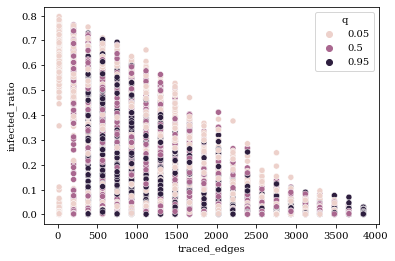

In [107]:
g = sns.scatterplot(
    data = data.sample(frac=1),
    y = 'infected_ratio',
    x = 'traced_edges',
    hue = 'q'
)

In [108]:
data[['infected_ratio', 'q', 'r', 'traced_edges', 'traced_edges_distant', 'traced_edges_close']].corr(
    method='spearman'
).dropna(how='all').dropna(axis=1,how='all')['infected_ratio']

infected_ratio          1.000000
q                      -0.037408
r                      -0.216839
traced_edges           -0.220001
traced_edges_distant   -0.038579
traced_edges_close     -0.216857
Name: infected_ratio, dtype: float64

In [109]:
import pingouin as pg
pg.partial_corr(
    data=data,
    x='traced_edges_close',
    y='infected_ratio',
    covar='traced_edges_distant',
    method='spearman'
)

,n,r,CI95%,p-val
spearman,84480,-0.216895,"[-0.22, -0.21]",0.0


In [110]:
import pingouin as pg
pg.partial_corr(
    data=data,
    x='traced_edges_close',
    y='infected_ratio',
    method='spearman'
)

,n,r,CI95%,p-val
spearman,84480,-0.216857,"[-0.22, -0.21]",0.0


In [111]:
pg.partial_corr(data=data, x='traced_edges', y='infected_ratio')

,n,r,CI95%,p-val
pearson,84480,-0.425149,"[-0.43, -0.42]",0.0


In [112]:
data['q_rounded'] = data['q'].round(3)

<AxesSubplot:>

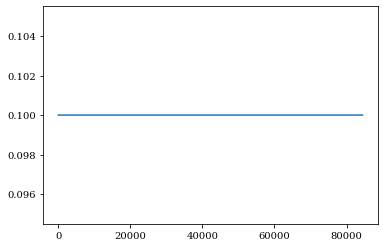

In [113]:
data['p'].plot()

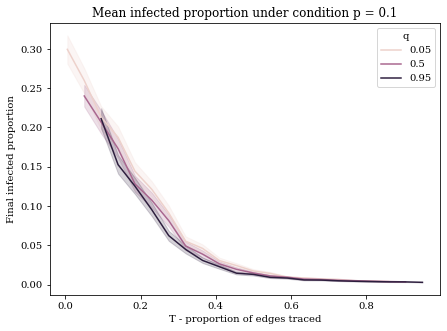

In [114]:
plt.figure(figsize=(7,5))

ax = sns.lineplot(
    x='T',
    y='infected_ratio',
    hue='q_rounded',
    data=data
)

ax.set_title(f"Mean infected proportion under condition p = {data['p'].mode()[0]}")
ax.set_xlabel("T - proportion of edges traced")
ax.set_ylabel("Final infected proportion")

ax.legend_.set_title('q')

plt.savefig('fig_T_FI_p010.pdf', format='pdf')

### Separating out the epidemic cases

We use the fact that the "natural" behavior of the simulation is when there is no contact tracing.
This is the case where there is the clearest distinction between early extinction and epidemic cases.

We use this distribution to identify the infection threshold of early extinction, considering anything higher than it an 'epidemic'. 

We then carry this threshold value through in analysis of cases with contact tracing.

We distinguish between the conditions under which contact tracing increases the probability of early extinction, and the conditions it reduces the size of the epidemic.

In [115]:
low_CT_data = data[(data['q'] == 0.05) & (data['r'] == 0.0)]

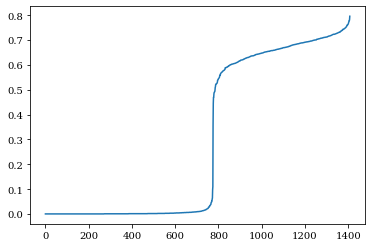

In [116]:
plt.plot(low_CT_data['infected_ratio'].sort_values().values)

In [117]:


values = low_CT_data['infected_ratio'].sort_values().values

def find_lower_mode_cutoff(values, tolerance):

    cutoff_idx = 0
    
    for i in range(len(values) - 1):
        cutoff_value = values[i]
    
        if not np.any(values[i+1:] < cutoff_value * tolerance):
            cutoff_idx = i

    return cutoff_idx, values[cutoff_idx]

## The resulting value here is robust to a very wide range of tolerance values.
idx_cutoff, cutoff = find_lower_mode_cutoff(values, 3)

idx_cutoff, cutoff, values[idx_cutoff]

(774, 0.1101234567901234, 0.1101234567901234)

In [118]:
data['upper_mode'] = data['infected_ratio'] > cutoff

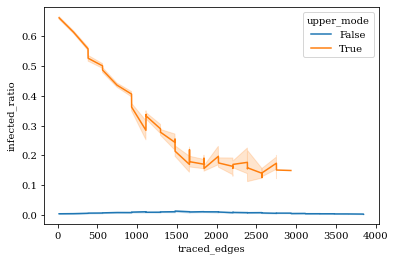

In [119]:
plt.rc('text', usetex=False)
g = sns.lineplot(
    data = data.fillna(0),
    y = 'infected_ratio',
    x = 'traced_edges',
    hue='upper_mode'
)

<AxesSubplot:xlabel='traced_edges'>

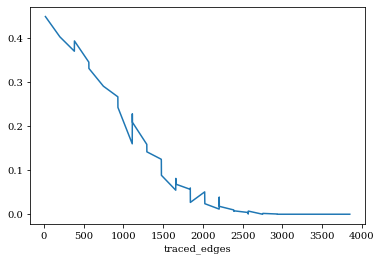

In [120]:
data.groupby('traced_edges')['upper_mode'].mean().plot()

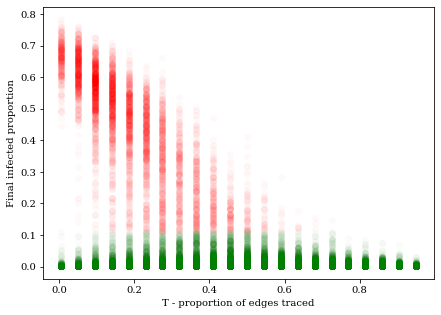

In [137]:

plt.figure(figsize=(7,5))

data_upper = data[data['upper_mode']]
data_lower = data[~data['upper_mode']]


d = data[data['upper_mode']].sample(frac=0.5)
ax1 = plt.scatter(d['T'], d['infected_ratio'], color = 'red', alpha=0.02, label="epidemic")
    
d = data[~data['upper_mode']].sample(frac=0.5)
ax2 = plt.scatter(d['T'], d['infected_ratio'], color = 'green', alpha=0.02, label="early extinction")

#plt.plot(X_upper, Y_upper_pred, color='yellow')
#plt.plot(X_lower, Y_lower_pred, color='cyan')

plt.xlabel('T - proportion of edges traced')
plt.ylabel('Final infected proportion')
#plt.show()

ax1.set_rasterized(True)
ax2.set_rasterized(True)

plt.savefig('fig_T_to_FI_scatter.pdf', format='pdf')

In [27]:
cutoff

0.1101234567901234

## How long does an epidemic case take?

If a time step is a day, then how many days do the epidemics take to complete? This is needed to better understand the interpretation and justify the static contact network.

/tmp/ipykernel_23059/423266478.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dx = data[data['upper_mode']][(data['q'] == 0.05) & (data['r'] == 0.0)]


Text(0.5, 0, 'Time (days)')

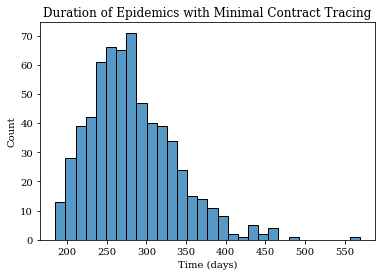

In [28]:
dx = data[data['upper_mode']][(data['q'] == 0.05) & (data['r'] == 0.0)]

ax = sns.histplot(dx['time'], bins=30)
ax.set_title("Duration of Epidemics with Minimal Contract Tracing")
ax.set_xlabel("Time (days)")
#ax.set_xlabel("Time (days)")

In [29]:
data[data['upper_mode']][(data['q'] == 0.05) & (data['r'] == 0.0)]['time'].mean()

/tmp/ipykernel_23059/1533393229.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['upper_mode']][(data['q'] == 0.05) & (data['r'] == 0.0)]['time'].mean()


281.9083728278041

In [30]:
data[data['upper_mode']][(data['q'] == 0.05) & (data['r'] == 0.0)]['time'].std()

/tmp/ipykernel_23059/1065690877.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['upper_mode']][(data['q'] == 0.05) & (data['r'] == 0.0)]['time'].std()


54.11700120133539

#### Notes on the hypotheses

Three stories:
 - (a) distant edges not a big deal because they are no different from close edges
 - (b) distant edges are less effective as close edges
 - (c) distant edges can have a slightly bigger effect of close edges but it's not be enough because $p$
 
 The question is: what is the difference in effect of a distant edge vs. a close edge?

[Text(0.5, 1.0, 'Infected ratio with variable tracing'),
 Text(0.5, 16.0, 'q'),
 Text(33.99999999999999, 0.5, 'r')]

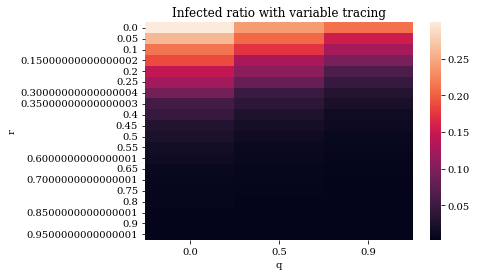

In [31]:
base = 0.05

g, xyz, db = model.binned_heatmap(
    data,
    x = 'q',
    x_base = base * 2,
    y = 'r',
    y_base = base,
    z = 'infected_ratio'
)

g.set(#xscale="log",
      title='Infected ratio with variable tracing',
      xlabel='q',
      ylabel='r')

[Text(0.5, 1.0, 'Infected ratio with variable tracing'),
 Text(0.5, 16.0, 'q'),
 Text(33.99999999999999, 0.5, 'T')]

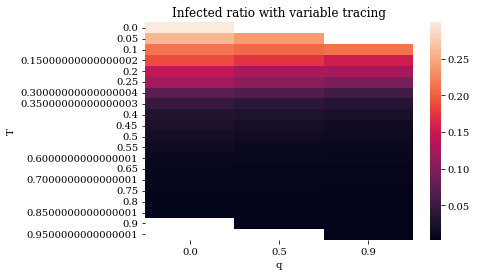

In [32]:
base = 0.05

g, xyz, db = model.binned_heatmap(
    data,
    x = 'q',
    x_base = base * 2,
    y = 'T',
    y_base = base,
    z = 'infected_ratio'
)

g.set(#xscale="log",
      title='Infected ratio with variable tracing',
      xlabel='q',
      ylabel='T')

In [33]:
data[['q','r','upper_mode']]

um_data_g = data.groupby(['q','T'])['upper_mode', 'infected_ratio'].mean().reset_index()

/tmp/ipykernel_23059/1130196930.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  um_data_g = data.groupby(['q','T'])['upper_mode', 'infected_ratio'].mean().reset_index()


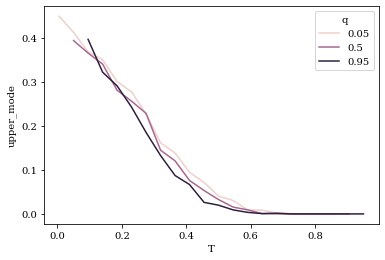

In [34]:
plt.rc('text', usetex=False)
g = sns.lineplot(
    data = um_data_g,
    y = 'upper_mode',
    x = 'T',
    hue='q'
)

In [35]:
qrdata = data.groupby(['q','r'])['infected_ratio'].agg(['mean','std','var','count'])
qrdata['upper_count'] = data.groupby(['q','r'])['upper_mode'].sum() / data.groupby(['q','r'])['case'].count()
#qrdata['upper_count'] = data.groupby(['q','r'])['upper_mode'].sum()
qrdata['upper_mean'] = data[data['upper_mode']].groupby(['q','r'])['infected_ratio'].mean()
qrdata['lower_mean'] = data[~data['upper_mode']].groupby(['q','r'])['infected_ratio'].mean()

qrdata['weighted_upper_mean'] = qrdata['upper_mean'] * qrdata['upper_count']# / qrdata['count']

qrdata = qrdata.reset_index()

p = .1

qrdata['T'] = qrdata['q'] * p + qrdata['r'] * (1 - p)

In [36]:
# qrdata

<AxesSubplot:xlabel='T', ylabel='upper_mean'>

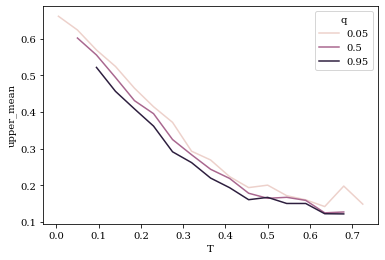

In [37]:
sns.lineplot(
    data=qrdata,
    x = 'T',
    y = 'upper_mean',
    hue = 'q'
)

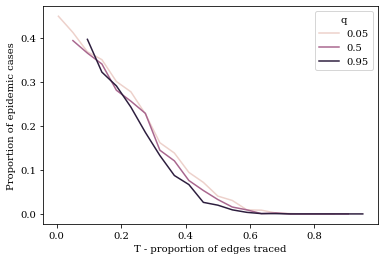

In [53]:
plt.figure(figsize=(6,4))

ax = sns.lineplot(
    data=qrdata,
    x = 'T',
    y = 'upper_count',
    hue = 'q'
)

ax.set_ylabel("Proportion of epidemic cases")
plt.xlabel('T - proportion of edges traced')

plt.savefig('fig_T_to_PE.pdf', format='pdf')

<AxesSubplot:xlabel='T', ylabel='weighted_upper_mean'>

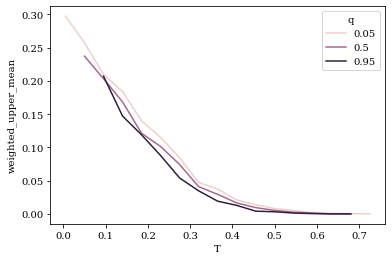

In [39]:
sns.lineplot(
    data=qrdata,
    x = 'T',
    y = 'weighted_upper_mean',
    hue = 'q'
)

### Comparing shift in q with shift in r

The results above confirm a small advantage to distant edges over close edges.

However, if we are trying to determine the tradeoff between tracing of close and distant edges, then we need to compare the marginal gain from a shift in `q` with a marginal gain from a shift in `r`.

<AxesSubplot:xlabel='r'>

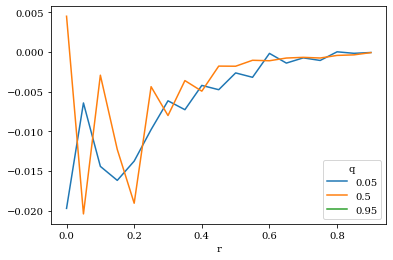

In [40]:
delta_r_diff_mean = qrdata.pivot('q','r','mean').diff(axis=1).shift(-1, axis=1)
delta_q_diff_mean = qrdata.pivot('q','r','mean').diff(axis=0).shift(-1, axis=0)

cd_diff = delta_q_diff_mean - delta_r_diff_mean

cd_diff.T.plot()

Text(0, 0.5, 'Mean difference in epidemic proportion')

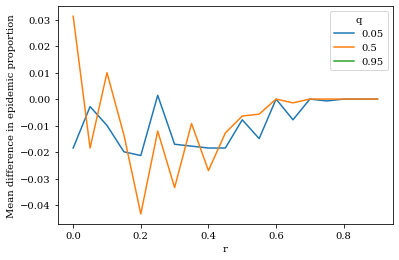

In [41]:
delta_r_diff_mean = qrdata.pivot('q','r','upper_count').diff(axis=1).shift(-1, axis=1)
delta_q_diff_mean = qrdata.pivot('q','r','upper_count').diff(axis=0).shift(-1, axis=0)

cd_diff = delta_q_diff_mean - delta_r_diff_mean

ax = cd_diff.T.plot()

ax.set_ylabel("Mean difference in epidemic proportion")

In [42]:
delta_q_diff_mean

r,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
q,,,,,,,,,,,,,,,,,,,,
0.05,-0.055398,-0.046875,-0.027699,-0.069602,-0.044744,-0.049006,-0.082386,-0.041193,-0.062500,-0.041193,-0.039062,-0.024858,-0.021307,-0.008523,-0.006392,-0.002131,-0.00071,0.0,0.0,0.0
0.50,0.002841,-0.043324,-0.049716,-0.038352,-0.071023,-0.095881,-0.057528,-0.053977,-0.049716,-0.033381,-0.023438,-0.012074,-0.008523,0.000000,-0.002131,0.000000,0.00000,0.0,0.0,0.0
0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
delta_r_diff_mean

r,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
q,,,,,,,,,,,,,,,,,,,,
0.05,-0.036932,-0.044034,-0.017756,-0.049716,-0.023438,-0.050426,-0.065341,-0.023438,-0.044034,-0.022727,-0.031250,-0.009943,-0.021307,-0.00071,-0.006392,-0.00142,-0.00071,0.0,0.0,NaN
0.50,-0.028409,-0.024858,-0.059659,-0.024858,-0.027699,-0.083807,-0.024148,-0.044744,-0.022727,-0.020597,-0.017045,-0.006392,-0.008523,0.00142,-0.002131,0.00000,0.00000,0.0,0.0,NaN
0.95,-0.074574,-0.031250,-0.048295,-0.057528,-0.052557,-0.045455,-0.020597,-0.040483,-0.006392,-0.010653,-0.005682,-0.002841,0.000000,-0.00071,0.000000,0.00000,0.00000,0.0,0.0,NaN


<AxesSubplot:xlabel='r'>

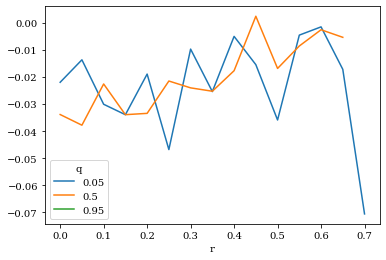

In [44]:
delta_r_diff_mean = qrdata.pivot('q','r','upper_mean').diff(axis=1).shift(-1, axis=1)
delta_q_diff_mean = qrdata.pivot('q','r','upper_mean').diff(axis=0).shift(-1, axis=0)

cd_diff = delta_q_diff_mean - delta_r_diff_mean

cd_diff.T.plot()

In [45]:
delta_q_diff_mean

r,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
q,,,,,,,,,,,,,,,,,,,,
0.05,-0.059381,-0.068119,-0.074920,-0.093262,-0.069255,-0.089450,-0.088262,-0.049241,-0.050316,-0.045265,-0.029171,-0.033148,-0.012804,-0.035366,-0.014815,NaN,NaN,NaN,NaN,NaN
0.50,-0.080052,-0.099113,-0.085758,-0.069243,-0.103985,-0.062895,-0.063585,-0.050186,-0.057966,-0.011259,-0.014076,-0.016831,-0.036429,-0.002963,NaN,NaN,NaN,NaN,NaN,NaN
0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
delta_r_diff_mean

r,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
q,,,,,,,,,,,,,,,,,,,,
0.05,-0.037474,-0.054528,-0.044882,-0.059357,-0.050383,-0.042643,-0.078635,-0.023892,-0.045393,-0.029884,0.006686,-0.028696,-0.011399,-0.018246,0.055802,-0.049218,NaN,NaN,NaN,NaN
0.50,-0.046213,-0.061329,-0.063223,-0.035350,-0.070578,-0.041455,-0.039614,-0.024967,-0.040342,-0.013790,0.002709,-0.008352,-0.033960,0.002305,NaN,NaN,NaN,NaN,NaN,NaN
0.95,-0.065274,-0.047974,-0.046708,-0.070092,-0.029488,-0.042144,-0.026215,-0.032747,0.006365,-0.016607,-0.000046,-0.027951,-0.000494,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='r'>

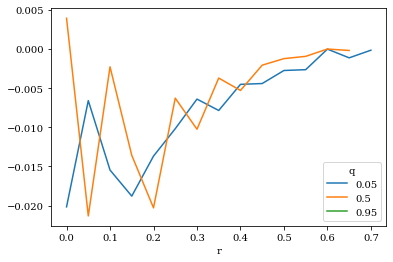

In [47]:
delta_r_diff_weighted_mean = qrdata.pivot('q','r','weighted_upper_mean').diff(axis=1).shift(-1, axis=1)
delta_q_diff_weighted_mean = qrdata.pivot('q','r','weighted_upper_mean').diff(axis=0).shift(-1, axis=0)

cd_diff = delta_q_diff_weighted_mean - delta_r_diff_weighted_mean

cd_diff.T.plot()

## Relative effect of change in q and r on the infected ratio

The noise at the low end _might_ be resolvable with more data.

In [48]:
data.drop_duplicates().shape

(84480, 40)

In [49]:
data.shape

(84480, 40)